In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg
import scipy.optimize as sopt
%config InlineBackend.figure_formats = ['svg']

In [2]:
from pmsm_mech_ctrl import pmsm_mech_ctrl_class

## Steady state

In [27]:
pm = pmsm_mech_ctrl_class()
pm.ini({'tau_r_ref':500,'i_d_ref':-10},0)
pm.report_x()
#pm.report_y()
#pm.report_params()
pm.report_z()

i_d   = -10.00
i_q   = 166.67
xi_i_d = -0.10
xi_i_q =  1.67
nu    = 54.26
x_pos = 542599.06
u_d   = -0.10
u_q   =  1.67
tau_r_ref = 500.00
v_pk  = 651.36
i_pk  = 166.97
omega_r = 171.71
f_w   = 1582.28
f_d   = 1229.12
f_r   = 353.16
tau_r = 500.00
p_r   = 85854.28
nu_kmh = 195.34


## Time domain simulation

In [28]:
pm = pmsm_mech_ctrl_class()
pm.Dt = 0.002
pm.ini({'tau_r_ref':0},0)
pm.run(  0.1,{'tau_r_ref':0.0})
pm.run(  0.2,{'tau_r_ref':1000.0})
pm.run(  15.0,{'i_d_ref':-10.0})

pm.post();

## Results

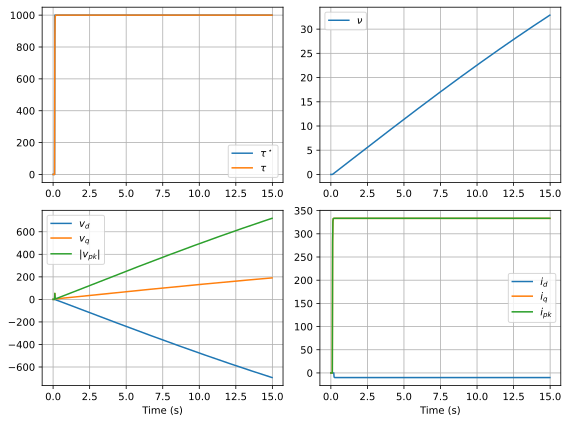

In [29]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(8, 6), dpi=100)

# torques
axes[0,0].plot(pm.Time, pm.get_values('tau_r_ref'), label=r'$\tau^\star$')
axes[0,0].plot(pm.Time, pm.get_values('tau_r'), label=r'$\tau$')

# speeds
axes[0,1].plot(pm.Time, pm.get_values('nu'), label=r'$\nu$')

# voltages
axes[1,0].plot(pm.Time, pm.get_values('v_d'), label=f'$v_d$')
axes[1,0].plot(pm.Time, pm.get_values('v_q'), label=f'$v_q$')
axes[1,0].plot(pm.Time, pm.get_values('v_pk'), label=f'$|v_{{pk}}|$')

# currents
axes[1,1].plot(pm.Time, pm.get_values('i_d'), label=f'$i_d$')
axes[1,1].plot(pm.Time, pm.get_values('i_q'), label=f'$i_q$')
axes[1,1].plot(pm.Time, pm.get_values('i_pk'), label=f'$i_{{pk}}$')

for ax in axes.flatten():
    ax.grid()
    ax.legend()
axes[1,0].set_xlabel('Time (s)')
axes[1,1].set_xlabel('Time (s)')
fig.tight_layout()